In [1]:
import pandas as pd

In [5]:
order = pd.read_excel("./Muesli_Project_raw_data.xlsx", sheet_name='Orders')

order = order.drop(columns=["Customer Name", "Origin Channel", "Country/Region", "City", "State", "Postal Code", "Category", "Sub-Category", "Product ID", "Sales", "Quantity", "Discount", "Profit"
]) 

In [6]:
order['Order Date'] = pd.to_datetime(order['Order Date'], dayfirst=True, errors='coerce')
order['day_of_the_week'] = order['Order Date'].dt.day_name()

In [19]:
order.drop_duplicates("Order ID")

,Index,Order ID,Order Date,Ship Mode,Customer ID,Region,day_of_the_week
0,27,CA-2019-121755,2019-01-16,Second Class,EH-13945,West,Wednesday
1,45,CA-2019-118255,2019-03-11,First Class,ON-18715,Central,Monday
2,48,CA-2019-169194,2019-06-20,Standard Class,LH-16900,East,Thursday
3,60,CA-2019-111682,2019-06-17,First Class,TB-21055,East,Monday
4,63,CA-2018-135545,2018-11-24,Standard Class,KM-16720,West,Saturday
...,...,...,...,...,...,...,...
9979,9760,CA-2019-146913,2019-10-31,Standard Class,SF-20965,West,Thursday
9980,9787,US-2017-114377,2017-11-05,First Class,BG-11035,South,Sunday
9984,9808,CA-2020-107209,2020-07-27,Second Class,JW-15955,South,Monday
9986,9830,US-2020-152842,2020-07-16,Standard Class,NF-18385,South,Thursday


In [20]:
campaign_data = pd.read_excel("./Muesli_Project_raw_data.xlsx", sheet_name='Campaign Data')
campaign_data["Arrival Scan Date"] = pd.to_datetime(campaign_data["Arrival Scan Date"], dayfirst=True, errors='coerce')
campaign_data.drop_duplicates("Order ID")

,Order ID,Arrival Scan Date,Customer Name
0,CA-2019-109666,2019-05-03,Kunst Miller
1,CA-2019-138933,2019-05-03,Jack Lebron
2,CA-2019-130001,2019-05-03,Heather Kirkland
3,CA-2019-113061,2019-05-06,Ed Ludwig
4,CA-2019-162138,2019-05-06,Grace Kelly
...,...,...,...
328,CA-2020-129707,2020-05-08,Larry Hughes
329,CA-2020-125381,2020-05-08,Speros Goranitis
330,CA-2020-141733,2020-05-15,Rick Wilson
331,US-2020-104451,2020-05-15,Michelle Moray


In [21]:
campaign_data['day_of_the_week'] = campaign_data['Arrival Scan Date'].dt.day_name()
campaign_data = campaign_data.drop(columns="Customer Name")

In [22]:
campaign_data

,Order ID,Arrival Scan Date,day_of_the_week
0,CA-2019-109666,2019-05-03,Friday
1,CA-2019-138933,2019-05-03,Friday
2,CA-2019-130001,2019-05-03,Friday
3,CA-2019-113061,2019-05-06,Monday
4,CA-2019-162138,2019-05-06,Monday
...,...,...,...
328,CA-2020-129707,2020-05-08,Friday
329,CA-2020-125381,2020-05-08,Friday
330,CA-2020-141733,2020-05-15,Friday
331,US-2020-104451,2020-05-15,Friday


In [26]:
order_process_data = pd.read_excel("./Muesli_Project_raw_data.xlsx", sheet_name='Order Process Data')

#order_process_data = order_process_data.drop_duplicates()

order_process_data = order_process_data.drop('Row ID',axis=1)
order_process_data['weekday_truckscan']=order_process_data['On Truck Scan Date'].dt.day_name()
order_process_data.drop_duplicates("Order ID")

,Order ID,Order Date,On Truck Scan Date,Ship Mode,weekday_truckscan
0,CA-2019-125206,2019-01-03,2019-01-07,Express,Monday
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,Wednesday
3,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,Wednesday
6,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,Wednesday
8,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,Wednesday
...,...,...,...,...,...
5890,CA-2020-130631,2020-12-29,2021-01-06,Standard Processing,Wednesday
5892,CA-2020-126221,2020-12-30,2021-01-06,Standard Processing,Wednesday
5893,CA-2020-143259,2020-12-30,2021-01-06,Standard Processing,Wednesday
5896,CA-2020-115427,2020-12-30,2021-01-06,Standard Processing,Wednesday


In [27]:
interndata_study = pd.read_excel("./Muesli_Project_raw_data.xlsx", sheet_name='InternData Study')

interndata_study = interndata_study.drop_duplicates()
interndata_study['weekday_readytoship']=interndata_study['Ready to Ship Date'].dt.day_name()
interndata_study['weekday_pickup']=interndata_study['Pickup Date'].dt.day_name()
interndata_study.drop_duplicates("Order ID")

,Order ID,Ready to Ship Date,Pickup Date,weekday_readytoship,weekday_pickup
0,CA-2019-116540,2019-09-02,2019-09-03,Monday,Tuesday
2,CA-2019-129847,2019-09-04,2019-09-04,Wednesday,Wednesday
3,CA-2019-129630,2019-09-04,2019-09-04,Wednesday,Wednesday
4,CA-2019-106278,2019-09-05,2019-09-06,Thursday,Friday
5,CA-2019-158099,2019-09-05,2019-09-06,Thursday,Friday
...,...,...,...,...,...
283,US-2020-165456,2020-12-03,2020-12-04,Thursday,Friday
284,US-2020-110576,2020-12-04,2020-12-07,Friday,Monday
285,CA-2020-105333,2020-12-04,2020-12-07,Friday,Monday
288,CA-2020-119305,2020-12-04,2020-12-07,Friday,Monday


In [28]:
df_merged = pd.merge(order, interndata_study, how="right", on='Order ID')
df_merged["difference"] = (df_merged["Ready to Ship Date"] - df_merged["Order Date"]).dt.days
#df_merged['difference'] = df_merged['difference'].astype(int)
meanmerged = df_merged["difference"].mean()
df_merged = df_merged.drop(columns=["Ship Mode", "Region", "Pickup Date", "weekday_pickup", "Customer ID"])
df_merged

,Index,Order ID,Order Date,day_of_the_week,Ready to Ship Date,weekday_readytoship,difference
0,3416,CA-2019-116540,2019-09-02,Monday,2019-09-02,Monday,0
1,3417,CA-2019-116540,2019-09-02,Monday,2019-09-02,Monday,0
2,6937,CA-2019-129847,2019-09-02,Monday,2019-09-04,Wednesday,2
3,9930,CA-2019-129630,2019-09-04,Wednesday,2019-09-04,Wednesday,0
4,9929,CA-2019-129630,2019-09-04,Wednesday,2019-09-04,Wednesday,0
...,...,...,...,...,...,...,...
413,5585,CA-2020-105333,2020-11-30,Monday,2020-12-04,Friday,4
414,5587,CA-2020-105333,2020-11-30,Monday,2020-12-04,Friday,4
415,956,CA-2020-119305,2020-11-30,Monday,2020-12-04,Friday,4
416,5066,CA-2020-142090,2020-11-30,Monday,2020-12-07,Monday,7


In [29]:
meanmerged

np.float64(4.157894736842105)

In [30]:
df_weekend = df_merged[df_merged['day_of_the_week'].isin(['Saturday', 'Sunday'])]


In [31]:
df_weekend

,Index,Order ID,Order Date,day_of_the_week,Ready to Ship Date,weekday_readytoship,difference
141,8226,CA-2020-104136,2020-11-01,Sunday,2020-11-05,Thursday,4
142,8227,CA-2020-104136,2020-11-01,Sunday,2020-11-05,Thursday,4
166,3560,CA-2020-152737,2020-11-07,Saturday,2020-11-09,Monday,2
167,3559,CA-2020-152737,2020-11-07,Saturday,2020-11-09,Monday,2
177,9493,CA-2020-163188,2020-11-07,Saturday,2020-11-09,Monday,2
185,2074,CA-2020-122504,2020-11-07,Saturday,2020-11-09,Monday,2
186,2075,CA-2020-122504,2020-11-07,Saturday,2020-11-09,Monday,2
229,961,CA-2020-152142,2020-11-14,Saturday,2020-11-16,Monday,2
237,8432,CA-2020-155621,2020-11-08,Sunday,2020-11-16,Monday,8
285,9218,US-2020-118157,2020-11-14,Saturday,2020-11-19,Thursday,5


In [51]:
df_weekend.loc[df_weekend['day_of_the_week'] == 'Sunday', 'difference'] -= 1
df_weekend.loc[df_weekend['day_of_the_week'] == 'Saturday', 'difference'] -= 2

In [52]:
df_weekend.describe()

,Index,Order Date,Ready to Ship Date,difference
count,34.000000,34,34,34.000000
mean,4216.294118,2020-11-18 06:21:10.588235264,2020-11-23 01:24:42.352941056,2.941176
min,948.000000,2020-11-01 00:00:00,2020-11-05 00:00:00,0.000000
25%,2220.500000,2020-11-14 00:00:00,2020-11-16 18:00:00,0.000000
50%,4011.500000,2020-11-21 00:00:00,2020-11-27 00:00:00,4.000000
75%,6309.250000,2020-11-21 00:00:00,2020-11-27 00:00:00,4.000000
max,9493.000000,2020-11-28 00:00:00,2020-12-04 00:00:00,7.000000
std,2724.185233,NaN,NaN,2.159422


In [33]:
# mean Saturday and Sunday = 2.941176

In [34]:
df_weekdays = df_merged[df_merged['day_of_the_week'].isin(['Monday', 'Tuesday', "Wedndesday", "Thursday", "Friday"])]
df_weekdays

,Index,Order ID,Order Date,day_of_the_week,Ready to Ship Date,weekday_readytoship,difference
0,3416,CA-2019-116540,2019-09-02,Monday,2019-09-02,Monday,0
1,3417,CA-2019-116540,2019-09-02,Monday,2019-09-02,Monday,0
2,6937,CA-2019-129847,2019-09-02,Monday,2019-09-04,Wednesday,2
5,9070,CA-2019-106278,2019-09-02,Monday,2019-09-05,Thursday,3
6,9069,CA-2019-106278,2019-09-02,Monday,2019-09-05,Thursday,3
...,...,...,...,...,...,...,...
413,5585,CA-2020-105333,2020-11-30,Monday,2020-12-04,Friday,4
414,5587,CA-2020-105333,2020-11-30,Monday,2020-12-04,Friday,4
415,956,CA-2020-119305,2020-11-30,Monday,2020-12-04,Friday,4
416,5066,CA-2020-142090,2020-11-30,Monday,2020-12-07,Monday,7


In [35]:
df_weekdays.describe()

,Index,Order Date,Ready to Ship Date,difference
count,301.000000,301,301,301.000000
mean,4960.222591,2020-07-09 22:14:45.049833984,2020-07-14 01:35:40.863787264,4.139535
min,97.000000,2019-09-02 00:00:00,2019-09-02 00:00:00,0.000000
25%,2950.000000,2019-09-24 00:00:00,2019-09-26 00:00:00,3.000000
50%,4827.000000,2020-11-06 00:00:00,2020-11-11 00:00:00,4.000000
75%,7127.000000,2020-11-17 00:00:00,2020-11-23 00:00:00,6.000000
max,9942.000000,2020-11-30 00:00:00,2020-12-07 00:00:00,7.000000
std,2705.364929,NaN,NaN,1.927122


In [ ]:
# mean weekdays = 4.139535
# mean total is (4.139535 + 2.941176) / 2 = 3,5403555

In [36]:
df_merged_2 = pd.merge(order_process_data, interndata_study, how="outer", on='Order ID')

In [40]:
df_merged_2 = df_merged_2.dropna()
df_merged_2

,Order ID,Order Date,On Truck Scan Date,Ship Mode,weekday_truckscan,Ready to Ship Date,Pickup Date,weekday_readytoship,weekday_pickup
6,CA-2019-100244,2019-09-20,2019-09-25,Standard Processing,Wednesday,2019-09-24,2019-09-25,Tuesday,Wednesday
7,CA-2019-100244,2019-09-20,2019-09-25,Standard Processing,Wednesday,2019-09-24,2019-09-25,Tuesday,Wednesday
8,CA-2019-100244,2019-09-20,2019-09-25,Standard Processing,Wednesday,2019-09-24,2019-09-25,Tuesday,Wednesday
9,CA-2019-100244,2019-09-20,2019-09-25,Standard Processing,Wednesday,2019-09-24,2019-09-25,Tuesday,Wednesday
10,CA-2019-100244,2019-09-20,2019-09-25,Standard Processing,Wednesday,2019-09-24,2019-09-25,Tuesday,Wednesday
...,...,...,...,...,...,...,...,...,...
5851,US-2020-165344,2020-11-13,2020-11-16,Express,Monday,2020-11-16,2020-11-16,Monday,Monday
5855,US-2020-165456,2020-11-30,2020-12-04,Express,Friday,2020-12-03,2020-12-04,Thursday,Friday
5882,US-2020-168116,2020-11-04,2020-11-04,Express,Wednesday,2020-11-04,2020-11-04,Wednesday,Wednesday
5883,US-2020-168116,2020-11-04,2020-11-04,Express,Wednesday,2020-11-04,2020-11-04,Wednesday,Wednesday


In [41]:
df_standard = df_merged_2[df_merged_2['Ship Mode'].isin(["Standard Processing"])]
df_standard

,Order ID,Order Date,On Truck Scan Date,Ship Mode,weekday_truckscan,Ready to Ship Date,Pickup Date,weekday_readytoship,weekday_pickup
6,CA-2019-100244,2019-09-20,2019-09-25,Standard Processing,Wednesday,2019-09-24,2019-09-25,Tuesday,Wednesday
7,CA-2019-100244,2019-09-20,2019-09-25,Standard Processing,Wednesday,2019-09-24,2019-09-25,Tuesday,Wednesday
8,CA-2019-100244,2019-09-20,2019-09-25,Standard Processing,Wednesday,2019-09-24,2019-09-25,Tuesday,Wednesday
9,CA-2019-100244,2019-09-20,2019-09-25,Standard Processing,Wednesday,2019-09-24,2019-09-25,Tuesday,Wednesday
10,CA-2019-100244,2019-09-20,2019-09-25,Standard Processing,Wednesday,2019-09-24,2019-09-25,Tuesday,Wednesday
...,...,...,...,...,...,...,...,...,...
5841,US-2020-163790,2020-11-02,2020-11-06,Standard Processing,Friday,2020-11-04,2020-11-06,Wednesday,Friday
5842,US-2020-163790,2020-11-02,2020-11-06,Standard Processing,Friday,2020-11-04,2020-11-06,Wednesday,Friday
5843,US-2020-163790,2020-11-02,2020-11-06,Standard Processing,Friday,2020-11-04,2020-11-06,Wednesday,Friday
5844,US-2020-163790,2020-11-02,2020-11-06,Standard Processing,Friday,2020-11-04,2020-11-06,Wednesday,Friday


In [43]:
df_standard.loc[:, "difference"] = (df_standard["On Truck Scan Date"] - df_standard["Ready to Ship Date"]).dt.days

In [44]:
df_standard

,Order ID,Order Date,On Truck Scan Date,Ship Mode,weekday_truckscan,Ready to Ship Date,Pickup Date,weekday_readytoship,weekday_pickup,difference
6,CA-2019-100244,2019-09-20,2019-09-25,Standard Processing,Wednesday,2019-09-24,2019-09-25,Tuesday,Wednesday,1
7,CA-2019-100244,2019-09-20,2019-09-25,Standard Processing,Wednesday,2019-09-24,2019-09-25,Tuesday,Wednesday,1
8,CA-2019-100244,2019-09-20,2019-09-25,Standard Processing,Wednesday,2019-09-24,2019-09-25,Tuesday,Wednesday,1
9,CA-2019-100244,2019-09-20,2019-09-25,Standard Processing,Wednesday,2019-09-24,2019-09-25,Tuesday,Wednesday,1
10,CA-2019-100244,2019-09-20,2019-09-25,Standard Processing,Wednesday,2019-09-24,2019-09-25,Tuesday,Wednesday,1
...,...,...,...,...,...,...,...,...,...,...
5841,US-2020-163790,2020-11-02,2020-11-06,Standard Processing,Friday,2020-11-04,2020-11-06,Wednesday,Friday,2
5842,US-2020-163790,2020-11-02,2020-11-06,Standard Processing,Friday,2020-11-04,2020-11-06,Wednesday,Friday,2
5843,US-2020-163790,2020-11-02,2020-11-06,Standard Processing,Friday,2020-11-04,2020-11-06,Wednesday,Friday,2
5844,US-2020-163790,2020-11-02,2020-11-06,Standard Processing,Friday,2020-11-04,2020-11-06,Wednesday,Friday,2


In [45]:
df_standard.describe() #mean für standard ist 2.047468

,Order Date,On Truck Scan Date,Ready to Ship Date,Pickup Date,difference
count,316,316,316,316,316.000000
mean,2020-06-27 02:25:49.367088640,2020-07-04 00:45:34.177215232,2020-07-01 23:37:12.911392512,2020-07-04 00:45:34.177215232,2.047468
min,2019-09-02 00:00:00,2019-09-06 00:00:00,2019-09-05 00:00:00,2019-09-06 00:00:00,1.000000
25%,2019-09-20 00:00:00,2019-09-25 00:00:00,2019-09-24 00:00:00,2019-09-25 00:00:00,2.000000
50%,2020-11-06 00:00:00,2020-11-12 00:00:00,2020-11-10 00:00:00,2020-11-12 00:00:00,2.000000
75%,2020-11-18 00:00:00,2020-11-25 00:00:00,2020-11-23 06:00:00,2020-11-25 00:00:00,3.000000
max,2020-11-30 00:00:00,2020-12-09 00:00:00,2020-12-07 00:00:00,2020-12-09 00:00:00,3.000000
std,NaN,NaN,NaN,NaN,0.695308


In [46]:
df_express = df_merged_2[df_merged_2['Ship Mode'].isin(["Express"])]
df_express

,Order ID,Order Date,On Truck Scan Date,Ship Mode,weekday_truckscan,Ready to Ship Date,Pickup Date,weekday_readytoship,weekday_pickup
301,CA-2019-110023,2019-09-09,2019-09-11,Express,Wednesday,2019-09-11,2019-09-11,Wednesday,Wednesday
504,CA-2019-116540,2019-09-02,2019-09-03,Express,Tuesday,2019-09-02,2019-09-03,Monday,Tuesday
505,CA-2019-116540,2019-09-02,2019-09-03,Express,Tuesday,2019-09-02,2019-09-03,Monday,Tuesday
882,CA-2019-129630,2019-09-04,2019-09-04,Express,Wednesday,2019-09-04,2019-09-04,Wednesday,Wednesday
883,CA-2019-129630,2019-09-04,2019-09-04,Express,Wednesday,2019-09-04,2019-09-04,Wednesday,Wednesday
...,...,...,...,...,...,...,...,...,...
5850,US-2020-165344,2020-11-13,2020-11-16,Express,Monday,2020-11-16,2020-11-16,Monday,Monday
5851,US-2020-165344,2020-11-13,2020-11-16,Express,Monday,2020-11-16,2020-11-16,Monday,Monday
5855,US-2020-165456,2020-11-30,2020-12-04,Express,Friday,2020-12-03,2020-12-04,Thursday,Friday
5882,US-2020-168116,2020-11-04,2020-11-04,Express,Wednesday,2020-11-04,2020-11-04,Wednesday,Wednesday


In [48]:
df_express.loc[:, "difference"] = (df_express["On Truck Scan Date"] - df_express["Ready to Ship Date"]).dt.days
df_express

,Order ID,Order Date,On Truck Scan Date,Ship Mode,weekday_truckscan,Ready to Ship Date,Pickup Date,weekday_readytoship,weekday_pickup,difference
301,CA-2019-110023,2019-09-09,2019-09-11,Express,Wednesday,2019-09-11,2019-09-11,Wednesday,Wednesday,0.0
504,CA-2019-116540,2019-09-02,2019-09-03,Express,Tuesday,2019-09-02,2019-09-03,Monday,Tuesday,1.0
505,CA-2019-116540,2019-09-02,2019-09-03,Express,Tuesday,2019-09-02,2019-09-03,Monday,Tuesday,1.0
882,CA-2019-129630,2019-09-04,2019-09-04,Express,Wednesday,2019-09-04,2019-09-04,Wednesday,Wednesday,0.0
883,CA-2019-129630,2019-09-04,2019-09-04,Express,Wednesday,2019-09-04,2019-09-04,Wednesday,Wednesday,0.0
...,...,...,...,...,...,...,...,...,...,...
5850,US-2020-165344,2020-11-13,2020-11-16,Express,Monday,2020-11-16,2020-11-16,Monday,Monday,0.0
5851,US-2020-165344,2020-11-13,2020-11-16,Express,Monday,2020-11-16,2020-11-16,Monday,Monday,0.0
5855,US-2020-165456,2020-11-30,2020-12-04,Express,Friday,2020-12-03,2020-12-04,Thursday,Friday,1.0
5882,US-2020-168116,2020-11-04,2020-11-04,Express,Wednesday,2020-11-04,2020-11-04,Wednesday,Wednesday,0.0


In [49]:
df_express.describe() #mean für express ist 0.392157

,Order Date,On Truck Scan Date,Ready to Ship Date,Pickup Date,difference
count,102,102,102,102,102.000000
mean,2020-08-29 20:28:14.117647104,2020-09-01 03:45:52.941176576,2020-08-31 18:21:10.588235264,2020-09-01 03:45:52.941176576,0.392157
min,2019-09-02 00:00:00,2019-09-03 00:00:00,2019-09-02 00:00:00,2019-09-03 00:00:00,0.000000
25%,2020-11-04 00:00:00,2020-11-06 00:00:00,2020-11-05 00:00:00,2020-11-06 00:00:00,0.000000
50%,2020-11-12 00:00:00,2020-11-13 00:00:00,2020-11-12 12:00:00,2020-11-13 00:00:00,0.000000
75%,2020-11-19 00:00:00,2020-11-23 00:00:00,2020-11-23 00:00:00,2020-11-23 00:00:00,1.000000
max,2020-11-30 00:00:00,2020-12-04 00:00:00,2020-12-03 00:00:00,2020-12-04 00:00:00,2.000000
std,NaN,NaN,NaN,NaN,0.510423


In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
data = [
    {"Process Type": "Real Process Time With Standard", "Time in Days": 10},
    {"Process Type": "Real Process Time With Express", "Time in Days": 8.4},
    {"Process Type": "Estimated Process Time", "Time in Days": 6.5}
]

df_total_time = pd.DataFrame(data)

df_total_time


,Process Type,Time in Days
0,Real Process Time With Standard,10.0
1,Real Process Time With Express,8.4
2,Estimated Process Time,6.5


C:\Users\skrau\AppData\Local\Temp\ipykernel_23536\2013715824.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_total_time, y="Process Type", x="Time in Days", palette=colors)


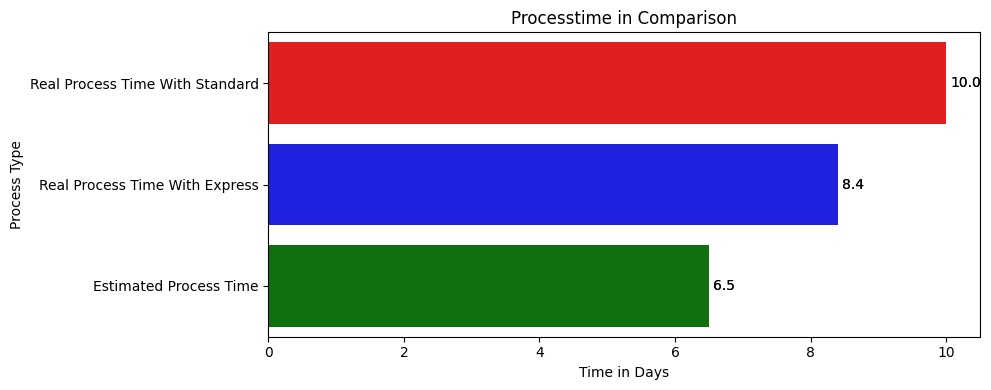

In [90]:
plt.figure(figsize=(10, 4))
sns.barplot(data=df_total_time, y="Process Type", x="Time in Days")

colors = ["red", "blue", "green"]

ax = sns.barplot(data=df_total_time, y="Process Type", x="Time in Days", palette=colors)

# Werte auf den Balken anzeigen
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", label_type="edge", padding=3)

plt.title("Processtime in Comparison")
plt.tight_layout()
plt.savefig("processtime")
plt.show()
